## VocalSet Technique Demo

### Below we show a waveform, spectrogram, playable audio, and label of each of the ten singing techniques used  to train our vocal technique and singer identification models.

In [ ]:
# Load libraries
# -*- coding: utf-8 -*-
import torch
import numpy as np
from torch.autograd import Variable
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import h5py
import matplotlib.pyplot as plt
import torch.optim as optim
import random
import tqdm
from tqdm import trange
import os
import librosa
from librosa import display
%matplotlib inline
import IPython.display as ipd
from audio_embed import utilities


In [23]:
# Load list of sample files
file_list = ['samples/f2_scales_vibrato_a(1).wav', "samples/f2_scales_straight_e.wav", "samples/f2_scales_breathy_e.wav", "samples/f2_scales_vocal_fry_o.wav", "samples/f2_scales_lip_trill_a.wav", "samples/f2_long_trill_a.wav", "samples/f2_long_trillo_a.wav", "samples/f2_long_inhaled_a.wav", "samples/f2_scales_belt_a.wav", "samples/f2_row_spoken.wav"]
title_list = ['Vibrato', 'Straight', 'Breathy', 'Vocal Fry', 'Lip Trill', 'Trill', 'Trillo', 'Inhaled', 'Belt', 'Spoken']

### First, listen to the 10 techniques used to train our vocal technique classifier:

In [40]:
# for count, f in enumerate(file_list):  
#     y, sr = librosa.load(f, duration=5, sr=44100)
#     print(title_list[count])
#     ipd.Audio(y, rate=sr)
#     break
# ipd.Audio(librosa.load(file_list[1], duration=5, sr=44100)[0])  
# y, sr = librosa.load(file_list[1], duration=5, sr=44100)
# print(title_list[count])
# ipd.Audio(y, rate=sr)

# y, sr = librosa.load(file_list[1], duration=5, sr=44100)
# # print(title_list[count])
# # ipd.Audio(y2, rate=sr)
# utilities.multitrack([(y, title_list[0])])

### Now view the waveform and mel spectrograms of the playable techniques above: 

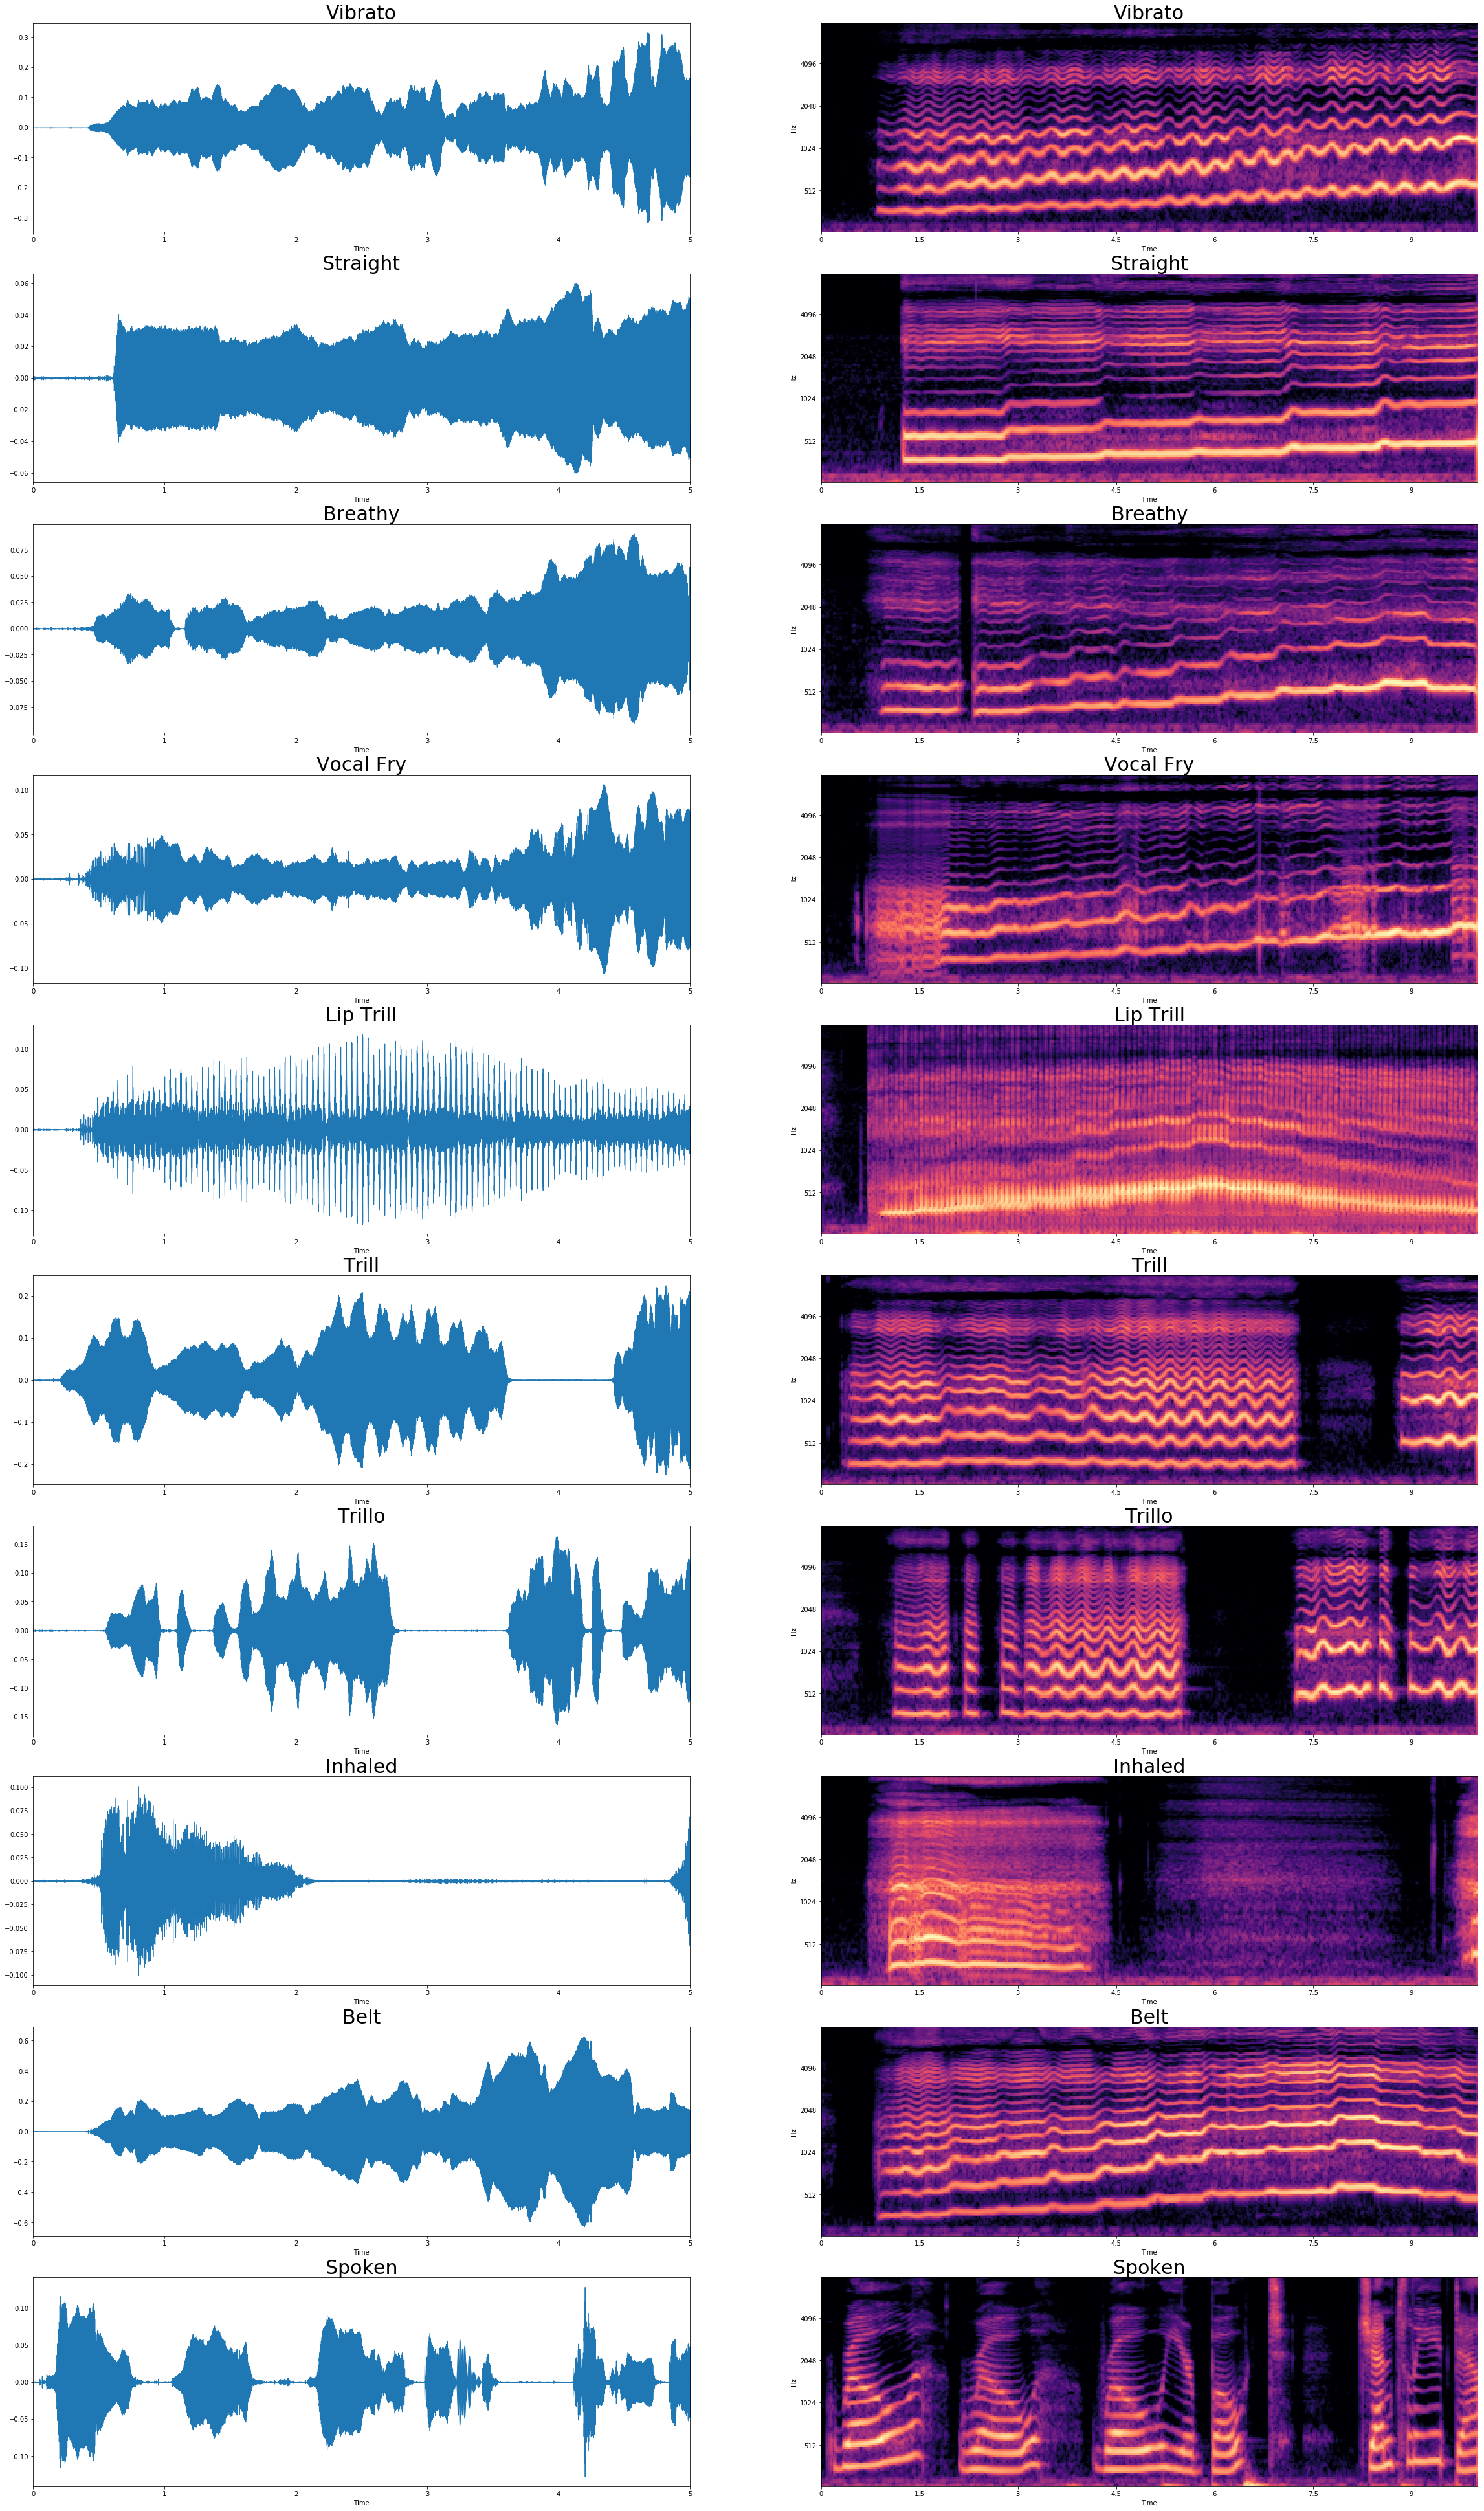

In [5]:
# Plots waveform and mel spectrogram of 10 sample files - 10 techcniques usesd in technique classification

def file_demos(list_of_files):
    sr=44100

    plt.subplots(nrows=10, ncols=2, figsize=(40, 70))
    plot_counter = 1
    title_counter = 0
    
    for a in list_of_files:
        y, sr = librosa.load(a, duration=5, sr=sr)
      
        plt.subplot(10, 2, plot_counter)
        plt.title(title_list[title_counter], fontsize=30)
        librosa.display.waveplot(y, sr=sr)
        
        plot_counter+=1
        
        plt.subplot(10, 2, plot_counter)
        plt.title(title_list[title_counter], fontsize=30)
        spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
        librosa.display.specshow(librosa.power_to_db(spec, ref=np.max), y_axis='mel', fmax=8000, x_axis='time')

        plot_counter+=1
        title_counter+=1
     
file_demos(file_list)